In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
books = pd.read_csv('books.csv')
book_tags = pd.read_csv('book_tags.csv')
ratings = pd.read_csv('ratings.csv')

Question 1: How many books do not have an original title?

In [3]:

books_without_original_title = books['original_title'].isnull().sum()
print(f"Number of books without an original title: {books_without_original_title}")

Number of books without an original title: 36


Question 2: How many unique books are present in the dataset?

In [4]:
# Remove records with null values for original_title column
books = books.dropna(subset=['original_title'])
# Remove corresponding records in book_tags and ratings
book_tags = book_tags[book_tags['goodreads_book_id'].isin(books['book_id'])]
ratings = ratings[ratings['book_id'].isin(books['book_id'])]
unique_books_count = books['book_id'].nunique()
print(f"Number of unique books in the dataset: {unique_books_count}")

Number of unique books in the dataset: 363


Question 3: How many unique users are present in the dataset?

In [5]:
unique_users_count = ratings['user_id'].nunique()
print(f"Number of unique users in the dataset: {unique_users_count}")

Number of unique users in the dataset: 40573


Question 4: How many unique tags are there in the dataset?

In [6]:
unique_tags_count = book_tags['tag_id'].nunique()
print(f"Number of unique tags in the dataset: {unique_tags_count}")

Number of unique tags in the dataset: 100


Question 5: Which tag_id is the most frequently used?

In [7]:
most_frequent_tag_id = book_tags['tag_id'].value_counts().idxmax()
print(f"Tag id most frequently used: {most_frequent_tag_id}")

Tag id most frequently used: 30574


Question 6: Which book has the most number of counts of tags given by the user?

In [8]:
most_tagged_book = book_tags.groupby('goodreads_book_id').size().idxmax()
most_tagged_book_title = books.loc[books['book_id'] == most_tagged_book, 'original_title'].values[0]
print(f"Book with the most counts of tags: {most_tagged_book_title}")

Book with the most counts of tags: Beyond Band of Brothers: The War Memoirs of Major Dick Winters


Plot a bar chart with top 20 unique tags in descending order of 'user records'

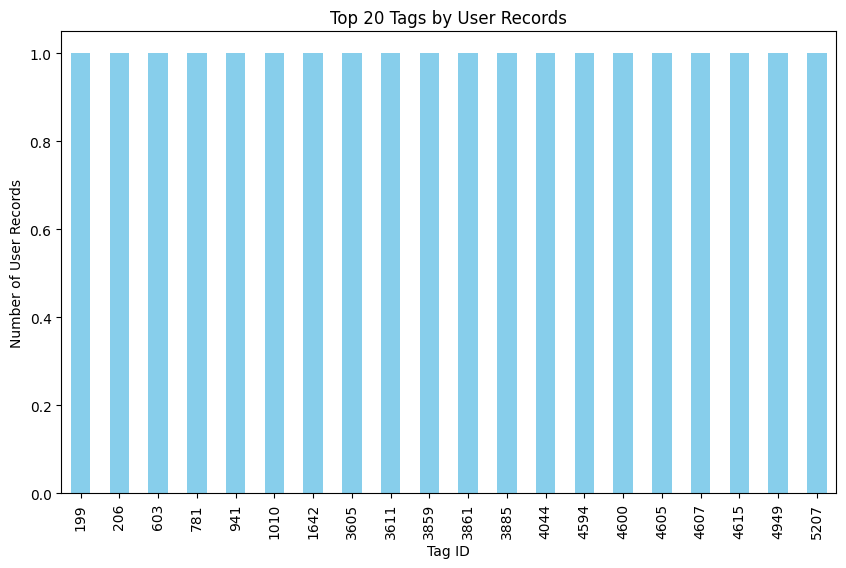

In [9]:
top_tags = book_tags.groupby('tag_id').size().nlargest(20)
plt.figure(figsize=(10, 6))
top_tags.plot(kind='bar', color='skyblue')
plt.title('Top 20 Tags by User Records')
plt.xlabel('Tag ID')
plt.ylabel('Number of User Records')
plt.show()